In [137]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [169]:
df = pd.read_excel ('./transfermarkt_clean.xlsx')
df.head(10)

,Unnamed: 0,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,0,Ederson,56000000,31,1993-08-17,Manchester City,Torwart,188,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,1,Claudio Bravo,1200000,1,1983-04-13,Manchester City,Torwart,184,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,2,John Stones,36000000,5,1994-05-28,Manchester City,Innenverteidiger,188,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom
3,3,Eric García,6300000,50,2001-01-09,Manchester City,Innenverteidiger,183,Barcelona,Premier League,20,2.177432,41.382894,España
4,4,Joel Latibeaudiere,100000,-,2000-01-06,Man City U23,Innenverteidiger,180,Doncaster,Premier League,21,-1.133531,53.522768,United Kingdom
5,5,Oleksandr Zinchenko,24000000,11,1996-12-15,Manchester City,Linker Verteidiger,175,"Radomyshl, Zhytomyr ...",Premier League,24,29.228959,50.496181,Україна
6,6,João Cancelo,36000000,27,1994-05-27,Manchester City,Rechter Verteidiger,182,Barreiro,Premier League,26,-9.047857,38.634066,Portugal
7,7,Fernandinho,8000000,25,1985-05-04,Manchester City,Defensives Mittelfeld,179,Londrina,Premier League,35,-51.159502,-23.311288,Brasil
8,8,Phil Foden,27000000,47,2000-05-28,Manchester City,Zentrales Mittelfeld,171,Stockport,Premier League,20,-2.160243,53.407901,United Kingdom
9,9,David Silva,12000000,21,1986-01-08,Manchester City,Offensives Mittelfeld,170,Arguineguín,Premier League,35,-15.681350,27.759075,España


Zunächst wird die Excel Datei, welche von dem Crawler erstellt wurde und von bereinigt wurde, in ein Dataframe geladen.

In [170]:
del df['Unnamed: 0']
df.head(3)

,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,Ederson,56000000,31,1993-08-17,Manchester City,Torwart,188,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,Claudio Bravo,1200000,1,1983-04-13,Manchester City,Torwart,184,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,John Stones,36000000,5,1994-05-28,Manchester City,Innenverteidiger,188,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom


Als nächstes muss wieder die Zeile "Unnamed" gelöscht werden, da diese durch ein Excel export / import automatisch erstellt wird.

In [171]:
df["Values"] = df.apply(lambda row: row["Values"] / 1000000, axis=1)
df.head(3)

,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,Ederson,56.0,31,1993-08-17,Manchester City,Torwart,188,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,Claudio Bravo,1.2,1,1983-04-13,Manchester City,Torwart,184,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,John Stones,36.0,5,1994-05-28,Manchester City,Innenverteidiger,188,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom


Nun werden die Values aus optischen Gründen in Millionnen angegeben. Dafür wird jeder Marktwert geteilt.

In [172]:
df[['Values','Age','Size']].describe()

,Values,Age
count,20914.000000,20914.000000
mean,3.064455,25.978866
std,9.359818,4.721866
min,0.025000,16.000000
25%,0.150000,22.000000
50%,0.325000,26.000000
75%,1.200000,29.000000
max,180.000000,45.000000


Mithilfe von df.describe lassen sich einfache Statistischen Merkmale berechnen. Hier kann man bereits den maximal Wert, den minimal Wert sowie den Durchschnittswert ablesen.

Text(0.5, 0, 'Alter')

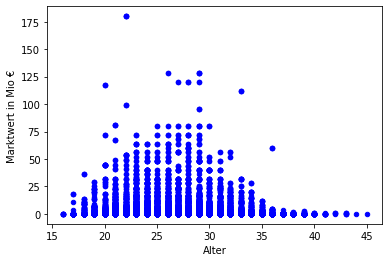

In [173]:
df.plot.scatter(x='Age',y='Values',c='Blue')
plt.ylabel("Marktwert in Mio €")
plt.xlabel("Alter")

Das folgende Punktediagramm zeigt eine erste Tedenz, in welchem alte der Marktwert der Fußballspieler am höchsten ist. Desweiteren lassen sich hier bereits erkennen in welchem Alterbereich die Spieler liegen.

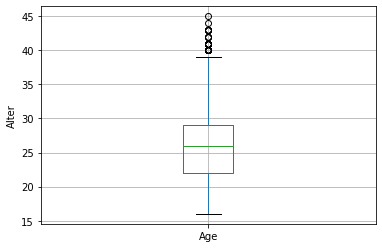

In [174]:
df.boxplot(column="Age")
plt.ylabel("Alter")
plt.title("Boxplot über das Alter der Spieler")
plt.show()

Der Boxplot Symbolisiert nochmals die Werte welche das df.describe bereits berechnet hat in Grafischer Form so sieht man das Alter der Fussballspieler auf einem Blick. So kann man Anhand des Boxplots erkennen, 
dass das Durchschnittsalter der Fussballspieler bei 26 liegt. Der jüngste Fussballspieler ist 16 und der älteste 39.

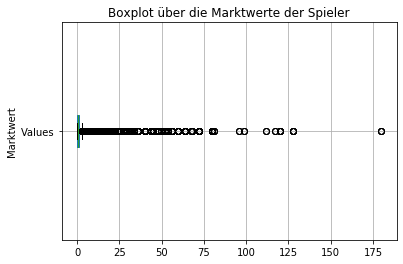

In [189]:
df.boxplot(column="Values", vert=False,)
plt.ylabel("Marktwert")
plt.title("Boxplot über die Marktwerte der Spieler")
plt.show()

Das gleiche wird hier dann nochmal für den Marktwer der Spieler gemacht. 
Hier ist dies allerdingsn nicht sehr aussagekräftig, da die Werte sehr groß sind und sehr streuen.

                   Values
Club                     
Paris SG         3386.800
Real Madrid      2665.500
FC Liverpool     2573.100
FC Barcelona     2530.950
Bayern München   2251.125
...                   ...
Orenburg II         0.025
Charleroi Res.      0.025
Olimp. Sarajevo     0.025
Mikkelin            0.025
 FC Boca Gib        0.025

[1080 rows x 1 columns]


Text(0, 0.5, 'Marktwert in Mio €')

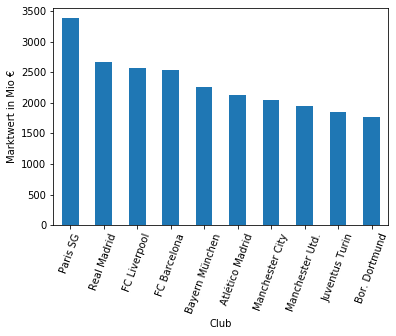

In [176]:
group_position = df[['Values','Club']]
group_position = group_position.groupby(['Club']).sum()
print(group_position.sort_values(by=['Values'], ascending=False))
first_ten_group_position = group_position.sort_values(by=['Values'], ascending=False)[:10]
first_ten_group_position['Values'].plot(kind="bar", rot=70)
plt.ylabel("Marktwert in Mio €")
plt.title("")


Hier wird die Liste nach dem jewailigen Verein Gruppiert und sortiert. Dabei werden die Marktwerte zusammensummiert um so eine gesamt Summe der Marktwerte für den jewailigen Club zuerhalten. Nun wurde eine Balkendiagramm aus den ersten 10 Clubs gemacht. 

          Values       Age
Values  1.000000  0.013908
Age     0.013908  1.000000


Text(0.5, 1, 'Korrelation zwischen Alter und Marktwert ')

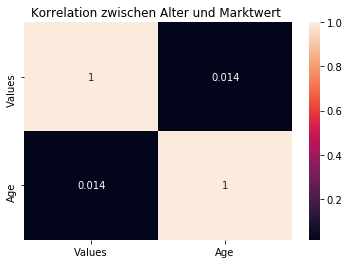

In [187]:
#df['Size'].astype('float')
import seaborn as sn # Wird genutzt um folgende Heatmap zu erstellen.
dfcorr = df[['Values', 'Age' ,'Size']]
corrMatrix = dfcorr.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.title("Korrelation zwischen Alter und Marktwert ")

Mit einer Kolleration lassen sich die Beziehungen zweier Werte beschreiben.
Hierfür wird ein Korrealtionskoeffizient gebildet. Dieser kann den Wert -1 bis 1 annehmen.
Wenn dieser Wert bei 0 liegt sagt dies aus das die Variablen keinen Zusammenhang haben.
In diesem Fall würde dies heißen, dass es keine Beziehung zwischen dem Alter und dem Marktwert gibt.

In [136]:
group_country = df[['country' , 'Values']].groupby("country").sum()
print(group_country.loc["Deutschland"])
#group_country.head(2)
#group_country = df[['Values' , 'country']]

Values    4305.128
Name: Deutschland, dtype: float64


Marktwert Summe für jedes Land bilden und diese dann als z in der Map definieren.

In [191]:
import chart_studio.plotly as py # Dient zur Dartstellung der untengezeigten Karte.
import plotly.graph_objs as go # Dient zur Dartstellung der untengezeigten Karte.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Dient zur Dartstellung der untengezeigten offline Karte.
init_notebook_mode(connected=True)
group_country = df[['country' , 'Values']]

data = dict(type = 'choropleth', 
           locations = group_country['country'],
           locationmode = 'country names',
           z = group_country['Values'], 
           text = group_country['country'],
           colorbar = {'title':'Marktwert'})
layout = dict(title = 'Heatmap Marktwerte je Land', 
             geo = dict(s
                        howframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Auf der darüber liegenden Karte sieht man die gesamt Summe der Marktwerte pro Land. Hieraus lässt sich erkennen wo der Kapitalismuss in den Fussball Ligen am höchsten ist 

In [178]:
from sklearn.cluster import KMeans
df_kmean = df[['Values', 'Age']]
km = KMeans(n_clusters=10)
km.fit(df_kmean)
y_km = km.predict(df_kmean)

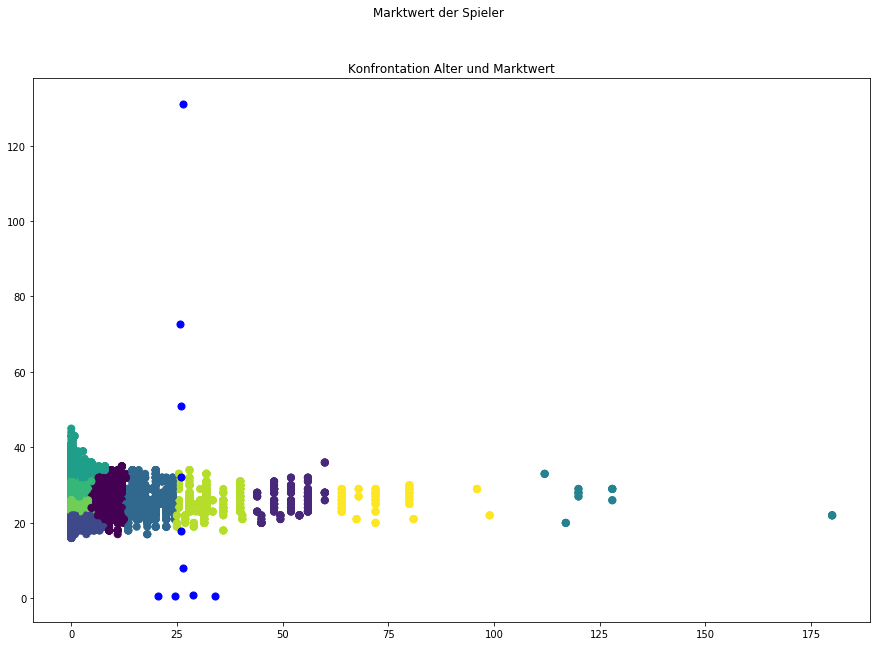

In [193]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(df_kmean["Values"], df_kmean['Age'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='blue', marker='.',s=200, alpha=1)
plt.title("Konfrontation Alter und Marktwert")
plt.suptitle("Marktwert der Spieler")
_=plt.xlabel('')

Der KMeans Algorithmus ist eine Clusteranalyse, mit dieser lassen sich Gruppierungen bilden.
So werden die Elemente welche nahe bei ananderliegen und sich ähnelnzusammengefasst und